In [ ]:
import os
# List the files in the /content/ directory
content_files = os.listdir('/content/')
print("Files in the /content/ directory:")
print(content_files)

Files in the /content/ directory:
['.config', 'nyc-taxi-trip-duration.zip', '.ipynb_checkpoints', 'test.csv', 'sample_submission.csv', 'train.csv', 'sample_data']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
sample_submission_df = pd.read_csv('/content/sample_submission.csv')

# Display the first few rows of each DataFrame
print("Train DataFrame:")
print(train_df.head())

print("\nTest DataFrame:")
print(test_df.head())

print("\nSample Submission DataFrame:")
print(sample_submission_df.head())

# Check for missing values in each DataFrame
print("\nMissing values in Train DataFrame:")
print(train_df.isnull().sum())

print("\nMissing values in Test DataFrame:")
print(test_df.isnull().sum())

print("\nMissing values in Sample Submission DataFrame:")
print(sample_submission_df.isnull().sum())

# Display summary statistics of each DataFrame
print("\nSummary statistics of Train DataFrame:")
print(train_df.describe())

print("\nSummary statistics of Test DataFrame:")
print(test_df.describe())

Train DataFrame:
          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0              1.0        -73.982155        40.767937         -73.964630   
1              1.0        -73.980415        40.738564         -73.999481   
2              1.0        -73.979027        40.763939         -74.005333   
3              1.0        -74.010040        40.719971         -74.012268   
4              1.0        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N          455.0  

In [ ]:
# Handle missing values by dropping them
train_df_cleaned = train_df.dropna()

# Convert datetime columns to appropriate data types
train_df_cleaned['pickup_datetime'] = pd.to_datetime(train_df_cleaned['pickup_datetime'])
train_df_cleaned['dropoff_datetime'] = pd.to_datetime(train_df_cleaned['dropoff_datetime'])

# Check the data types to ensure the conversion
print("\nData types after conversion:")
print(train_df_cleaned.dtypes)

# Remove outliers by trip duration
trip_duration_quantiles = train_df_cleaned['trip_duration'].quantile([0.01, 0.99])
train_df_cleaned = train_df_cleaned[(train_df_cleaned['trip_duration'] >= trip_duration_quantiles.iloc[0]) &
                                    (train_df_cleaned['trip_duration'] <= trip_duration_quantiles.iloc[1])]

<ipython-input-13-14e3e8a4c684>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_cleaned['pickup_datetime'] = pd.to_datetime(train_df_cleaned['pickup_datetime'])



Data types after conversion:
id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count              float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                float64
dtype: object


<ipython-input-13-14e3e8a4c684>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_cleaned['dropoff_datetime'] = pd.to_datetime(train_df_cleaned['dropoff_datetime'])



Average Trip Duration (seconds): 814.8278671524007


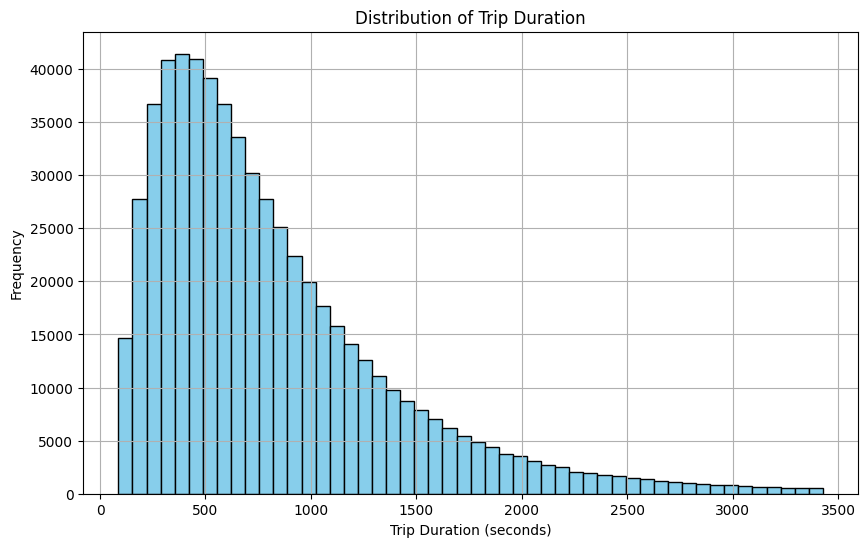

In [ ]:
# Calculate trip duration in seconds
train_df_cleaned['calculated_trip_duration'] = (train_df_cleaned['dropoff_datetime'] - train_df_cleaned['pickup_datetime']).dt.total_seconds()

# Calculate the average trip duration
average_trip_duration = train_df_cleaned['calculated_trip_duration'].mean()
print("\nAverage Trip Duration (seconds):", average_trip_duration)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.hist(train_df_cleaned['calculated_trip_duration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

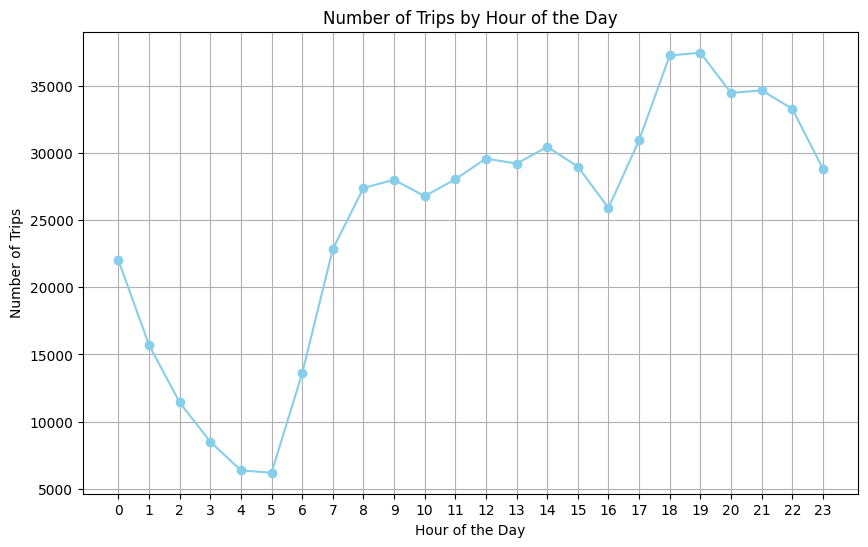

In [ ]:
# Extract hour from pickup datetime
train_df_cleaned['pickup_hour'] = train_df_cleaned['pickup_datetime'].dt.hour

# Count the number of trips during each hour of the day
hourly_trip_counts = train_df_cleaned['pickup_hour'].value_counts().sort_index()

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(hourly_trip_counts.index, hourly_trip_counts.values, marker='o', linestyle='-', color='skyblue')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(range(24))
plt.show()

In [ ]:
# Find the longest trip duration
longest_trip = train_df_cleaned.loc[train_df_cleaned['calculated_trip_duration'].idxmax()]

print("\nLongest Trip Details:")
print(longest_trip)

# Additional insights into the pickup/dropoff locations and other trip details
print("\nPickup Location:", (longest_trip['pickup_latitude'], longest_trip['pickup_longitude']))
print("Dropoff Location:", (longest_trip['dropoff_latitude'], longest_trip['dropoff_longitude']))
print("Trip Duration (seconds):", longest_trip['calculated_trip_duration'])


Longest Trip Details:
id                                    id3377682
vendor_id                                     1
pickup_datetime             2016-06-17 23:18:48
dropoff_datetime            2016-06-18 00:15:55
passenger_count                             1.0
pickup_longitude                     -73.990768
pickup_latitude                       40.734692
dropoff_longitude                    -73.882965
dropoff_latitude                      40.736237
store_and_fwd_flag                            N
trip_duration                            3427.0
calculated_trip_duration                 3427.0
pickup_hour                                  23
Name: 54139, dtype: object

Pickup Location: (40.73469161987305, -73.99076843261719)
Dropoff Location: (40.736236572265625, -73.88296508789062)
Trip Duration (seconds): 3427.0


In [ ]:
import pandas as pd    ## Feature Engineering
import numpy as np

# Load the dataset
train_df = pd.read_csv('/content/train.csv')

# Convert pickup_datetime to datetime object with error handling
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'], errors='coerce')

# Remove rows with NaT values
train_df = train_df.dropna(subset=['pickup_datetime'])

# Extract features from pickup_datetime
train_df['pickup_hour'] = train_df['pickup_datetime'].dt.hour
train_df['pickup_day_of_week'] = train_df['pickup_datetime'].dt.dayofweek

# Calculate trip distance using Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # radius of Earth in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    return R * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))

train_df['trip_distance'] = haversine_distance(
    train_df['pickup_latitude'],
    train_df['pickup_longitude'],
    train_df['dropoff_latitude'],
    train_df['dropoff_longitude']
)

# Calculate trip speed (km/h)
train_df['trip_speed'] = train_df['trip_distance'] / (train_df['trip_duration'] / 3600)

# Drop unnecessary columns
train_df = train_df.drop(['id', 'pickup_datetime', 'dropoff_datetime'], axis=1)

# Normalize numerical features
numeric_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_distance', 'trip_speed']
train_df[numeric_cols] = (train_df[numeric_cols] - train_df[numeric_cols].mean()) / train_df[numeric_cols].std()

# Encode categorical features (if any)
# For example, you can use one-hot encoding for categorical features

# Save the preprocessed dataset
train_df.to_csv('/content/train_preprocessed.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the preprocessed dataset
train_df = pd.read_csv('/content/train_preprocessed.csv')

# Drop any non-numeric columns
train_df = train_df.select_dtypes(include=['number'])

# Split the dataset into features (X) and target (y)
X = train_df.drop(['trip_duration'], axis=1)
y = train_df['trip_duration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Train the models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


In [ ]:
# Predict on the testing set
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Define a function to evaluate the models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Evaluate each model
results_lr = evaluate_model(y_test, y_pred_lr)
results_dt = evaluate_model(y_test, y_pred_dt)
results_rf = evaluate_model(y_test, y_pred_rf)

# Print the results
print("\nLinear Regression Results:", results_lr)
print("\nDecision Tree Results:", results_dt)
print("\nRandom Forest Results:", results_rf)


Linear Regression Results: {'MAE': 419.2061766042231, 'MSE': 9576846.470346322, 'RMSE': 3094.6480365861194, 'R2': -0.06268638793831749}

Decision Tree Results: {'MAE': 29.03288056206089, 'MSE': 428965.8664168618, 'RMSE': 654.9548583046483, 'R2': 0.9524001780186332}

Random Forest Results: {'MAE': 32.65244777517564, 'MSE': 1150642.272452309, 'RMSE': 1072.6799487509352, 'R2': 0.8723199871578119}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Grid Search with Random Forest model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform Grid Search
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Train the best Random Forest model
best_rf = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on the testing set using the best Random Forest model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the performance of the best Random Forest model
results_best_rf = evaluate_model(y_test, y_pred_best_rf)

# Print the best parameters and evaluation results
print("Best Parameters for Random Forest:", best_params_rf)
print("\nBest Random Forest Results:", results_best_rf)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}

Best Random Forest Results: {'MAE': 32.33652554410264, 'MSE': 1128920.5277977097, 'RMSE': 1062.5067189423837, 'R2': 0.8747303215448349}


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Function to calculate haversine distance
def haversine_distance(row):
    from math import radians, cos, sin, asin, sqrt
    lat1, lon1, lat2, lon2 = row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']

    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))

    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km

# Preprocess train dataset
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'], errors='coerce')
train_df['dropoff_datetime'] = pd.to_datetime(train_df['dropoff_datetime'], errors='coerce')
train_df['pickup_hour'] = train_df['pickup_datetime'].dt.hour
train_df['pickup_day_of_week'] = train_df['pickup_datetime'].dt.dayofweek

# Apply haversine_distance function to each row
train_df['trip_distance'] = train_df.apply(haversine_distance, axis=1)

# Calculate trip duration in seconds
train_df['trip_duration'] = (train_df['dropoff_datetime'] - train_df['pickup_datetime']).dt.total_seconds()

# Handle missing values in 'store_and_fwd_flag'
train_df['store_and_fwd_flag'].fillna('N', inplace=True)

# Drop unnecessary columns
train_df = train_df.drop(['id', 'pickup_datetime', 'dropoff_datetime'], axis=1)

# Convert categorical variables to numerical
train_df['store_and_fwd_flag'] = train_df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

# Convert non-numeric values to NaNs and handle missing values
train_df = train_df.apply(pd.to_numeric, errors='coerce')

# Handle missing values
train_df = train_df.dropna(subset=['trip_duration', 'trip_distance', 'pickup_hour', 'pickup_day_of_week'])
train_df = train_df.fillna(train_df.mean())

# Ensure the dataset is not empty
if train_df.empty:
    raise ValueError("The training dataset is empty after preprocessing!")

# Select numeric columns and apply normalization
numeric_cols = train_df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])

# Split the data into features and target variable
X = train_df.drop('trip_duration', axis=1)
y = train_df['trip_duration']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Train and evaluate models
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    model_results[name] = {"MAE": mae, "MSE": mse, "R2": r2}

print("Model Evaluation Results:")
for name, metrics in model_results.items():
    print(f"{name} - MAE: {metrics['MAE']:.2f}, MSE: {metrics['MSE']:.2f}, R2: {metrics['R2']:.2f}")

# Hyperparameter tuning for the best model (Random Forest in this example)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Preprocess the test dataset similarly to the training dataset
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'], errors='coerce')
test_df['pickup_hour'] = test_df['pickup_datetime'].dt.hour
test_df['pickup_day_of_week'] = test_df['pickup_datetime'].dt.dayofweek

# Apply haversine_distance function to each row
test_df['trip_distance'] = test_df.apply(haversine_distance, axis=1)

# Handle missing values in 'store_and_fwd_flag'
test_df['store_and_fwd_flag'].fillna('N', inplace=True)

# Drop unnecessary columns
test_ids = test_df['id']  # Save test ids for submission
test_df = test_df.drop(['id', 'pickup_datetime'], axis=1)

# Convert categorical variables to numerical
test_df['store_and_fwd_flag'] = test_df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

# Convert non-numeric values to NaNs and handle missing values
test_df = test_df.apply(pd.to_numeric, errors='coerce')

# Fill NaNs with the column mean to ensure there are no missing values
test_df = test_df.fillna(test_df.mean())

# Ensure the dataset is not empty
if test_df.empty:
    raise ValueError("The test dataset is empty after preprocessing!")

# Normalize numerical features using the mean and std from the train set
test_df[numeric_cols[:-1]] = scaler.transform(test_df[numeric_cols[:-1]])

# Make predictions using the optimized Random Forest model
y_pred_test_rf = best_rf.predict(test_df)

# Prepare the submission file
submission = pd.DataFrame({
    "id": test_ids,
    "trip_duration": y_pred_test_rf
})

# Save the submission file
submission.to_csv('/content/submission.csv', index=False)

print("Submission file created successfully!")


Model Evaluation Results:
Random Forest - MAE: 0.08, MSE: 0.46, R2: -0.19
Linear Regression - MAE: 0.09, MSE: 0.38, R2: 0.03
Decision Tree - MAE: 0.10, MSE: 1.83, R2: -3.74
